In [3]:
#Add dependencies
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [4]:
#Import and display your csv
#=============================================
ff2019_df = pd.read_csv('Resources/2019.csv')
display(ff2019_df)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Christian McCaffrey*\McCaCh01,CAR,RB,23,16,16,0,2,0,...,19,1.0,NaN,355.0,471.2,477.2,413.2,215.0,1,1.0
1,2,Lamar Jackson*\JackLa00,BAL,QB,22,15,15,265,401,3127,...,7,NaN,1.0,418.0,417.7,431.7,423.7,152.0,1,2.0
2,3,Derrick Henry*\HenrDe00,TEN,RB,25,15,15,0,0,0,...,18,NaN,NaN,277.0,294.6,303.6,285.6,136.0,2,3.0
3,4,Aaron Jones\JoneAa00,GNB,RB,25,16,16,0,0,0,...,19,NaN,NaN,266.0,314.8,322.8,290.3,125.0,3,4.0
4,5,Ezekiel Elliott*\ElliEz00,DAL,RB,24,16,16,0,0,0,...,14,NaN,NaN,258.0,311.7,319.7,284.7,117.0,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Ray-Ray McCloud\McClRa00,CAR,NaN,23,6,0,0,0,0,...,0,NaN,NaN,-2.0,-2.0,-1.0,-2.0,NaN,234,NaN
599,600,Darrius Shepherd\ShepDa00,GNB,WR,24,6,0,0,0,0,...,0,NaN,NaN,-2.0,-0.9,0.1,-1.4,NaN,233,NaN
600,601,Jarrett Stidham\StidJa00,NWE,QB,23,3,0,2,4,14,...,0,NaN,NaN,-2.0,-1.6,-0.6,-0.6,NaN,73,NaN
601,602,Michael Walker\WalkMi00,JAX,WR,23,7,0,0,0,0,...,0,NaN,NaN,-3.0,-0.5,1.5,-1.5,NaN,236,NaN


In [5]:
#drop unneccessary columns
#=================================================================================================================
ff2019_df.drop(['Rk', '2PM', '2PP', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)


In [6]:
display(ff2019_df)

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,TD,Int,...,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,FL,TD.3,FantPt,OvRank
0,Christian McCaffrey*\McCaCh01,CAR,RB,23,16,0,2,0,0,0,...,15,142,116,1005,8.66,4,0,19,355.0,1.0
1,Lamar Jackson*\JackLa00,BAL,QB,22,15,265,401,3127,36,6,...,7,0,0,0,NaN,0,2,7,418.0,2.0
2,Derrick Henry*\HenrDe00,TEN,RB,25,15,0,0,0,0,0,...,16,24,18,206,11.44,2,3,18,277.0,3.0
3,Aaron Jones\JoneAa00,GNB,RB,25,16,0,0,0,0,0,...,16,68,49,474,9.67,3,2,19,266.0,4.0
4,Ezekiel Elliott*\ElliEz00,DAL,RB,24,16,0,0,0,0,0,...,12,71,54,420,7.78,2,2,14,258.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Ray-Ray McCloud\McClRa00,CAR,NaN,23,6,0,0,0,0,0,...,0,0,0,0,NaN,0,1,0,-2.0,NaN
599,Darrius Shepherd\ShepDa00,GNB,WR,24,6,0,0,0,0,0,...,0,2,1,1,1.00,0,1,0,-2.0,NaN
600,Jarrett Stidham\StidJa00,NWE,QB,23,3,2,4,14,0,1,...,0,0,0,0,NaN,0,0,0,-2.0,NaN
601,Michael Walker\WalkMi00,JAX,WR,23,7,0,0,0,0,0,...,0,3,2,15,7.50,0,2,0,-3.0,NaN


In [7]:
#Name format fix
#===========================================================================================================
ff2019_df['Player'] = ff2019_df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

In [8]:
#Rename columns
#=========================
ff2019_df.rename({
'TD': 'PassingTD',
'TD.1': 'RushingTD',
'TD.2': 'ReceivingTD',
'TD.3': 'TotalTD',
'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs',
'Att': 'PassingAtt',
'Att.1': 'RushingAtt',
'G': 'Games Played',
'Tm': 'Team'
}, axis=1, inplace=True)



In [9]:
display(ff2019_df)

,Player,Team,FantPos,Age,Games Played,Cmp,PassingAtt,PassingYDs,PassingTD,Int,...,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,TotalTD,FantPt,OvRank
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,...,15,142,116,1005,8.66,4,0,19,355.0,1.0
1,Lamar Jackson,BAL,QB,22,15,265,401,3127,36,6,...,7,0,0,0,NaN,0,2,7,418.0,2.0
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,...,16,24,18,206,11.44,2,3,18,277.0,3.0
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,...,16,68,49,474,9.67,3,2,19,266.0,4.0
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,...,12,71,54,420,7.78,2,2,14,258.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Ray-Ray McCloud,CAR,NaN,23,6,0,0,0,0,0,...,0,0,0,0,NaN,0,1,0,-2.0,NaN
599,Darrius Shepherd,GNB,WR,24,6,0,0,0,0,0,...,0,2,1,1,1.00,0,1,0,-2.0,NaN
600,Jarrett Stidham,NWE,QB,23,3,2,4,14,0,1,...,0,0,0,0,NaN,0,0,0,-2.0,NaN
601,Michael Walker,JAX,WR,23,7,0,0,0,0,0,...,0,3,2,15,7.50,0,2,0,-3.0,NaN


In [10]:
#Create separate dataframes based off position
#================================================
rb_df = ff2019_df[ff2019_df['FantPos'] == 'RB']
qb_df = ff2019_df[ff2019_df['FantPos'] == 'QB']
wr_df = ff2019_df[ff2019_df['FantPos'] == 'WR']
te_df = ff2019_df[ff2019_df['FantPos'] == 'TE']

In [11]:
#Checking the new data frame
qb_df.head()

,Player,Team,FantPos,Age,Games Played,Cmp,PassingAtt,PassingYDs,PassingTD,Int,...,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,TotalTD,FantPt,OvRank
1,Lamar Jackson,BAL,QB,22,15,265,401,3127,36,6,...,7,0,0,0,NaN,0,2,7,418.0,2.0
11,Dak Prescott,DAL,QB,26,16,388,596,4902,30,11,...,3,0,0,0,NaN,0,2,3,340.0,12.0
13,Russell Wilson,SEA,QB,31,16,341,516,4110,31,5,...,3,0,0,0,NaN,0,2,3,331.0,14.0
17,Deshaun Watson,HOU,QB,24,15,333,495,3852,26,12,...,7,1,1,6,6.0,1,3,8,320.0,18.0
29,Jameis Winston,TAM,QB,25,16,380,626,5109,33,30,...,1,0,0,0,NaN,0,5,1,307.0,30.0


In [12]:
#Create column variables 
#=======================================================================
passing_columns = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int']
rushing_columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD' ]
receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']


In [13]:
#Create a change column function

def change_columns(ff2019_df, new_column_list):
    ff2019_df = ff2019_df[['Player', 'Team','Age', 'Games Played'] + new_column_list + ['FL']]
    return ff2019_df

In [14]:
#Change columns in the separate data frames
rb_df = change_columns(rb_df,rushing_columns+receiving_columns)
wr_df = change_columns(wr_df,rushing_columns+receiving_columns)
te_df = change_columns(te_df,receiving_columns)
qb_df = change_columns(qb_df, passing_columns)


In [15]:
wr_df.head(10)

,Player,Team,Age,Games Played,RushingAtt,RushingYDs,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL
6,Michael Thomas,NOR,26,16,1,-9,-9.0,0,185,149,1725,11.58,9,0
14,Chris Godwin,TAM,23,14,1,8,8.0,0,121,86,1333,15.50,9,0
19,Kenny Golladay,DET,26,16,0,0,NaN,0,116,65,1190,18.31,11,1
25,Cooper Kupp,LAR,26,16,2,4,2.0,0,134,94,1161,12.35,10,0
26,Julio Jones,ATL,30,15,2,-3,-1.5,0,157,99,1394,14.08,6,0
27,DeVante Parker,MIA,26,16,0,0,NaN,0,128,72,1202,16.69,9,0
31,Amari Cooper,DAL,25,16,1,6,6.0,0,119,79,1189,15.05,8,0
32,Mike Evans,TAM,26,13,0,0,NaN,0,118,67,1157,17.27,8,0
33,A.J. Brown,TEN,22,16,3,60,20.0,1,84,52,1051,20.21,8,0
34,DeAndre Hopkins,HOU,27,15,2,18,9.0,0,150,104,1165,11.20,7,0


In [16]:
qb_df.head(10)

,Player,Team,Age,Games Played,PassingAtt,PassingYDs,PassingTD,Int,FL
1,Lamar Jackson,BAL,22,15,401,3127,36,6,2
11,Dak Prescott,DAL,26,16,596,4902,30,11,2
13,Russell Wilson,SEA,31,16,516,4110,31,5,2
17,Deshaun Watson,HOU,24,15,495,3852,26,12,3
29,Jameis Winston,TAM,25,16,626,5109,33,30,5
46,Josh Allen,BUF,23,16,461,3089,20,9,4
48,Patrick Mahomes,KAN,24,14,484,4031,26,5,2
51,Kyler Murray,ARI,22,16,542,3722,20,12,2
58,Aaron Rodgers,GNB,36,16,569,4002,26,4,4
59,Carson Wentz,PHI,27,16,607,4039,27,7,7


In [17]:
#Create a new column to calculate fantasy points scored
#======================================================================================
rb_df['FantasyPoints'] = rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec']\
+ rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2

In [18]:
#Create a new column for fantasy points per game
#==============================================================
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['Games Played']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

In [19]:
#Create a new column for usage per game. Usage is defined as # of targets + carries
#=====================================================================================
rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt'])/rb_df['Games Played']

#Round each row value to two decimal places
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x, 2))

In [20]:
#Create a new column for rushing attempts per game
rb_df['RushingAtt/Gm'] = rb_df['RushingAtt']/rb_df['Games Played']

In [21]:
#Round each row to the nearest one hundreth
rb_df['RushingAtt/GM'] = rb_df['RushingAtt/GM'].apply(lambda x: round(x,2))

KeyError: 'RushingAtt/GM'

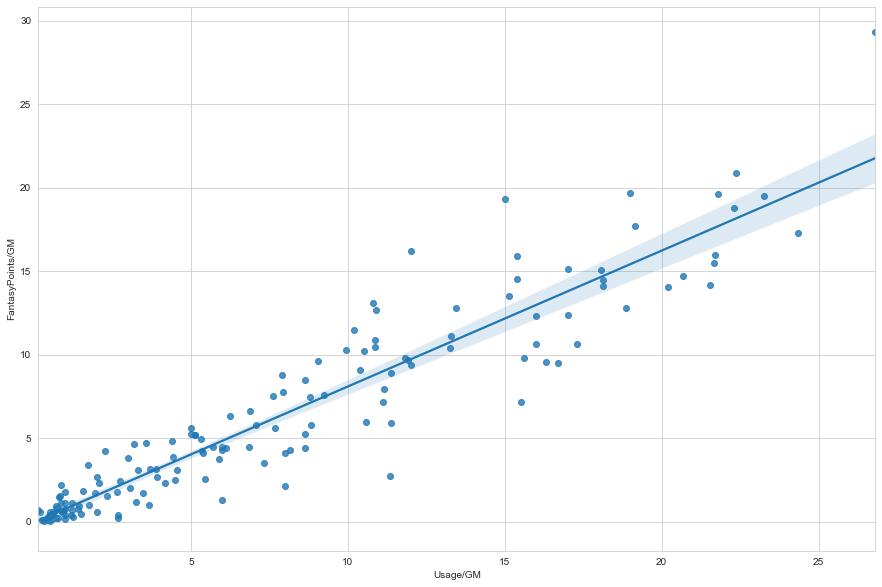

In [22]:
#just for styling. We imported seaborn earlier as sns.
sns.set_style('whitegrid')

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

#basic regression scatter plot with trendline
plot = sns.regplot(
x=rb_df['Usage/GM'],
y=rb_df['FantasyPoints/GM'],
scatter=True,)

In [23]:
def  regression_plot(x_values, y_values, x_label, y_label, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #Get regression values (x values times slope plus intercept)
    regress_values = x_values * slope + intercept
    
    #Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(14,10))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 16)
    plt.ylabel(y_label,fontsize = 16)
    
    #Create an if for the ylim
    if ylim is not None:
        plt.ylim(0, ylim)
    
    #Title string and font size
    #plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} ",fontsize = 16)
    
    #The annotate() function in pyplot module of matplotlib library is used to annotate the point xy with texts(GeeksforGeeks)
    #
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4),\
                 textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3),\
                 textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4),\
                 textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    
    #Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

The r-squared is: 0.006462691236573566
The correlation between both factors is 0.08


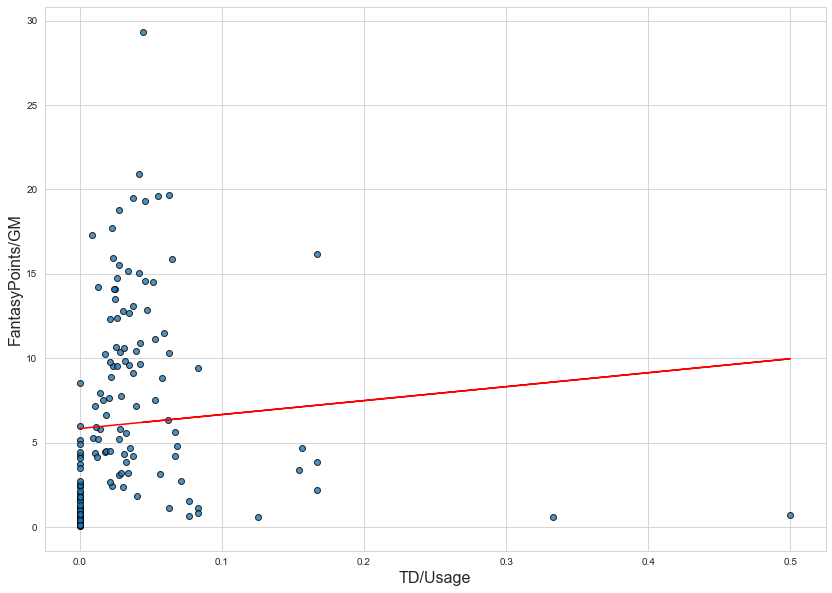

In [24]:
#How does efficiency correlate to fantasy football performance?
rb_df['TD/Usage'] = (rb_df['RushingTD']+ rb_df['ReceivingTD'])/(rb_df['RushingAtt'] + rb_df['Tgt'])

x_values =rb_df['TD/Usage']
y_values =rb_df['FantasyPoints/GM']

regression_plot(x_values, y_values, 'TD/Usage', 'FantasyPoints/GM', (0,0))

plt.show()


In [28]:
#Convert df to csv's
qb_df.to_csv('C:/Users/DeferentAtom94/OneDrive/Desktop/FF Project/qb.csv', index=False)


In [30]:
#Convert RB, WR, TE
rb_df.to_csv('C:/Users/DeferentAtom94/OneDrive/Desktop/FF Project/rb.csv', index=False)
wr_df.to_csv('C:/Users/DeferentAtom94/OneDrive/Desktop/FF Project/wr.csv', index=False)
te_df.to_csv('C:/Users/DeferentAtom94/OneDrive/Desktop/FF Project/te.csv', index=False)